# Preliminaries

Python version: python 3.5.2

# Take aways

- Vanilla gradient descent method struck are local minima.
- Momentum methods and Adam are able to reached global minima.
- Both Polyak's momentum and Nesterov's Momentum have the highest loss variance as these methods overshoot the minima several times.
- Adam method has the least loss variance.

In [1]:
#%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# Objective function

$$ f(x,y) = \frac{50}{9} (x^2 +y^2)^3 - \frac{209}{18}(x^2 +y^2)^2 + \frac{50}{9} (x^2 +y^2)$$

This function has local minima of value $0.5$ at $x^2+y^2=1$ and global minima of value $0$ at $(0,0)$.

In [2]:
def f(x,y):
    return (50./9.)*((x**2+y**2)**3) - (209./18.)*((x**2+y**2)**2) + (59./9.)*(x**2+y**2)

# Visualization of Objective function

x and y values are varied from -1 to 1 with stride of 0.05; The correspoding f values are calculated and plotted in 3D.

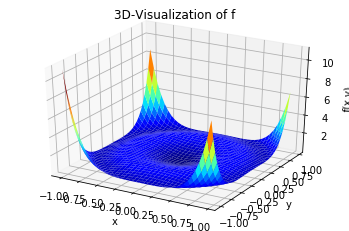

In [3]:
x, y = np.meshgrid(np.arange(-1, 1, 0.05), np.arange(-1, 1, 0.05)) 
z = f(x,y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D-Visualization of f')
ax.plot_surface(x, y, z, cmap='jet', edgecolor='none')
plt.show()

# Gradients of Objective function

\begin{align}
    \frac{\partial f}{\partial x}  &= \frac{100x}{3}(x^2+y^2)^2 - \frac{418x}{9}(x^2+y^2) + \frac{118}{9}x\\
    \frac{\partial f}{\partial f}  &= \frac{100y}{3}(x^2+y^2)^2 - \frac{418y}{9}(x^2+y^2) + \frac{118}{9}y
\end{align}

In [4]:
def calc_dW(W):
    x = W[0]
    y = W[1]
    dx = (100./3.)*x*((x**2+y**2)**2) - (418./9.)*x*(x**2+y**2) + (118./9.)*x
    dy = (100./3.)*y*((x**2+y**2)**2) - (418./9.)*y*(x**2+y**2) + (118./9.)*y
    return np.array([dx,dy])

# Gradient Descent

Update rule:

\begin{align}
    w_{t+1} &= w_{t} - \eta * \nabla w_t\\
\end{align}


The number of epochs to reach convergence is:  155
Error after last epoch is 0.5000001078697176 and the correspoding weights are [-0.70705513  0.70705513]


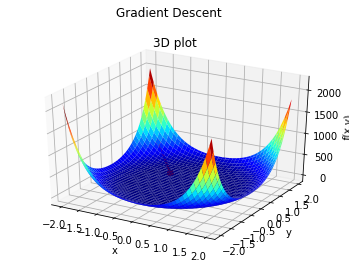

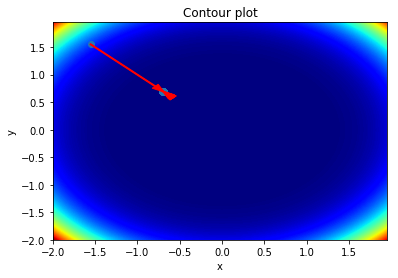

In [5]:
E = 10
E_prev = 100
W = np.array([2,-2])
eta = 0.001

Ehistory = []
Whistory = []

#convergence is reached when diffrence between the consequitve losses is very minimal
while(abs(E-E_prev) > 1e-8):
    E_prev = E
    dW = calc_dW(W)
    W = W-(eta*dW)
    Whistory.append(W)
    E = f(W[0],W[1])
    Ehistory.append(E)

Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))

x, y = np.meshgrid(np.arange(-2,2, 0.05), np.arange(-2, 2, 0.05)) 
z = f(x,y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient Descent')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

#contour plot

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(10):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Gradient descent with Polyak's momentum

Update rule:

\begin{align}
    update_t &= \beta * update_{t-1} + \eta* \nabla w_t\\
    w_{t+1} &= w_{t} - update_t
\end{align}

The number of epochs to reach convergence is:  554
Error after last epoch is 3.134889599884865e-07 and the correspoding weights are [-0.00015463  0.00015463]


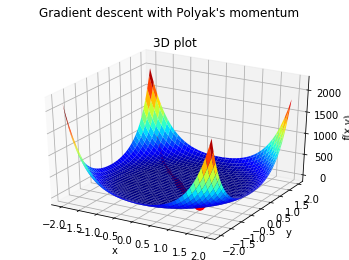

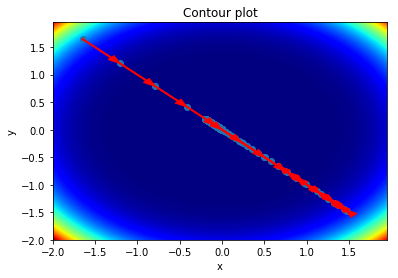

In [6]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.0001
beta = 0.9
update = np.array([0,0])
Ehistory = []
Whistory = []

#convergence is reached when diffrence between the consequitve losses is very minimal
while(abs(E-E_prev) > 1e-8):
    E_prev = E
    dW = calc_dW(W)
    update = (beta * update) + (eta*dW)
    W = W - update
    Whistory.append(W)
    E = f(W[0],W[1])
    Ehistory.append(E)
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient descent with Polyak\'s momentum')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

#contour plot

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.1, 
              length_includes_head=True,color='red')
ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(20):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Gradient Descent with  Nesterov's Momentum

Update rule:

\begin{align}
    w_{look-ahead} &= w_t - \beta * update_{t-1}\\
    update_t &= \beta * update_{t-1} + \eta* \nabla w_{look-ahead}\\
    w_{t+1} &= w_{t} - update_t
\end{align}

The number of epochs to reach convergence is:  1308
Error after last epoch is 1.7196545104685155e-05 and the correspoding weights are [-0.00114525  0.00114525]


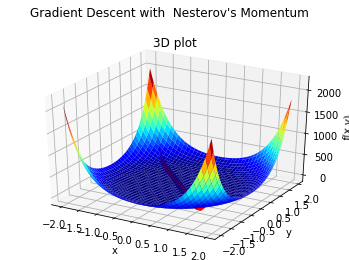

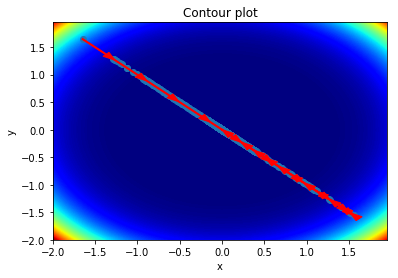

In [7]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.0001
beta = 0.99
update = np.array([0,0])
Ehistory = []
Whistory = []

#convergence is reached when diffrence between the consequitve losses is very minimal
while(abs(E-E_prev) > 1e-8):
    E_prev = E
    Wlook_ahead = W - (beta * update)
    dWlook_ahead = calc_dW(Wlook_ahead)
    update = (beta * update) + (eta*dWlook_ahead)
    W = W - update
    Whistory.append(W)
    E = f(W[0],W[1])
    Ehistory.append(E)
    
    
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gradient Descent with  Nesterov\'s Momentum')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(20):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()

# Adam optimizer

Update rule:

\begin{align}
    m_t &= \beta _1 * m_{t-1} + (1- \beta _1)*\nabla w_{t}\\
    u_t &= \beta _2 * u_{t-1} + (1- \beta _2)*(\nabla w_{t})^2\\
    \hat{m}_{t} &= \frac{m_{t}}{1-\beta_{1}^{t}}\\
    \hat{u}_{t} &= \frac{u_{t}}{1-\beta_{2}^{t}}\\
    w_{t+1} &= w_{t} - \frac{\eta}{\sqrt{\hat{u}_{t}+\epsilon}}*\hat{m}_{t}
\end{align}

The number of epochs to reach convergence is:  1887
Error after last epoch is 3.400226288445523e-05 and the correspoding weights are [ 0.00161041 -0.00161041]


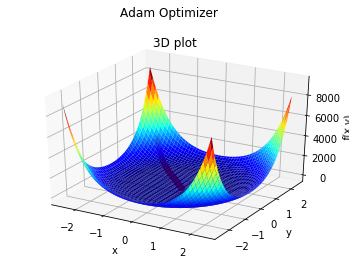

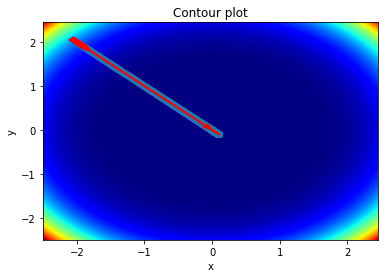

In [8]:
E = 10
E_prev = 100
W = np.array([-2,2])
eta = 0.01
beta1 = 0.99
beta2 = 0.99
epsilon = 1e-8
m = np.array([0,0])
u = np.array([0,0])
Ehistory = []
Whistory = []
t = 0
#convergence is reached when diffrence between the consequitve losses is very minimal
while(abs(E-E_prev) > 1e-8):
    E_prev = E
    t=t+1
    dW = calc_dW(W)
    m = (beta1*m) + ((1.-beta1)*dW)
    u = (beta2*u) + ((1.-beta2)*(dW**2))
    m_hat = m/(1-(beta1)**t)
    u_hat = u/(1-(beta2)**t)
    W = W - ((eta*m_hat)/(np.sqrt(u_hat+epsilon)))
    Whistory.append(W)
    E = f(W[0],W[1])
    Ehistory.append(E)
Ehistory = np.array(Ehistory)
Whistory = np.array(Whistory)

print("The number of epochs to reach convergence is: ", len(Ehistory))
print("Error after last epoch is {} and the correspoding weights are {}".format(Ehistory[-1],Whistory[-1]))

x, y = np.meshgrid(np.arange(-2.5,2.5, 0.05), np.arange(-2.5, 2.5, 0.05)) 
z = f(x,y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Adam Optimizer')
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('3D plot')
ax1.plot_surface(x, y, z, cmap='jet', edgecolor='none')
ax1.plot(Whistory[:,0], Whistory[:,1], Ehistory, color = 'red', linewidth=2)
ax1.scatter(Whistory[:,0], Whistory[:,1], Ehistory, color ='red')
plt.show()

ax2 = plt.axes()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot')
ax2.contourf(x, y, z, cmap='jet',linestyles = 'solid', levels=500)
ax2.plot(Whistory[:,0], Whistory[:,1], color = 'red', linewidth=2)

for i in range(20):
    drawArrow(Whistory[i],Whistory[i+1])

drawArrow(Whistory[-2],Whistory[-1])
    
ax2.scatter(Whistory[:,0], Whistory[:,1],)
plt.show()